## Importing library

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore", category=UserWarning)

In [103]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__,sklearn.__version__

('1.26.4', '1.5.3', '0.12.2', '3.7.2', '1.7.1')

In [104]:
# Loading the Cars.csv Data sets
df= pd.read_csv('Cars.csv')

In [105]:
# Displaying first five samples
df.head(5)

name  year  selling_price  km_driven    fuel  ...  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel  ...   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel  ...   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol  ...   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel  ...   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol  ...   

      mileage   engine   max_power                    torque seats  
0   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm   5.0  
1  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm   5.0  
2   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)   5.0  
3   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm   5.0  
4   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)   5.0  

[5 rows x 13 columns]

In [106]:
# Checking the shape that number of sample size and features
df.shape

(8128, 13)

In [107]:
# Checking datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [108]:
# Checking the nan values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [109]:
 # Column owner has different categories, so before mapping, checking the categories in owner columna
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [110]:
# creating a dictionary mapping and mapping the owner column.
mapping = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner']= df['owner'].map(mapping)

In [111]:
# Verifying the owner category 
df['owner'].value_counts()

1    5289
2    2105
3     555
4     174
5       5
Name: owner, dtype: int64

In [112]:
# for feautre fuel, remove all rows with CNG and LPG. Before that lets check the categori in the feature fuel
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [113]:
# Selecting the rows of feature fuel that does not contain CNG and LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [114]:
# Removing the kmpl fromt the feature mileage and converting the object data types to the float.
df['mileage']= df['mileage'].str.split().str[0].astype(float)

/tmp/ipykernel_10/1114855828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage']= df['mileage'].str.split().str[0].astype(float)


In [115]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['engine']= df['engine'].str.split().str[0].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [116]:
#  Removing the CC fromt the feature engine and converting the object data types to the float.
df['max_power']= df['max_power'].str.split().str[0].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [117]:
# As mentioned brand, lets change the feature name to brand
df =df.rename(columns={'name':'brand'})


In [118]:
# Taking only the first word of the brand
df['brand']=df['brand'].str.split().str[0]

In [119]:
# verifying the df
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power                    torque  seats  
0      1    23.40  1248.0      74.00            190Nm@ 2000rpm    5.0  
1      2    21.14  1498.0     103.52       250Nm@ 1500-2500rpm    5.0  
2      3    17.70  1497.0      78.00     12.7@ 2,700(kgm@ rpm)    5.0  
3      1    23.00  1396.0      90.00  22.4 kgm at 1750-2750rpm    5.0  
4      1    16.10  1298.0      88.20     11.5@ 4,500(kgm@ rpm)    5.0

In [120]:
# Droping the feature torque because it is no longer needed 
df = df.drop(columns='torque')

In [121]:
# verifying the all torque removed or not
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [122]:
# removing Test Drive Cars from the which was mapped to 5 in the owner feature
df =df[df['owner'] !=5]

In [123]:
# verifying Onwer
df['owner'].unique()

array([1, 2, 3, 4])

In [124]:
df.head()

brand  year  selling_price  km_driven    fuel seller_type transmission  \
0   Maruti  2014         450000     145500  Diesel  Individual       Manual   
1    Skoda  2014         370000     120000  Diesel  Individual       Manual   
2    Honda  2006         158000     140000  Petrol  Individual       Manual   
3  Hyundai  2010         225000     127000  Diesel  Individual       Manual   
4   Maruti  2007         130000     120000  Petrol  Individual       Manual   

   owner  mileage  engine  max_power  seats  
0      1    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      3    17.70  1497.0      78.00    5.0  
3      1    23.00  1396.0      90.00    5.0  
4      1    16.10  1298.0      88.20    5.0

In [125]:
# Another way of checking the all Column along with its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [126]:
## Univariate Analyis
num_feature = df.select_dtypes(include=['int64','float64'])
cat_feature = df.select_dtypes(exclude=['int64','float64'])

<Axes: xlabel='mileage', ylabel='Count'>

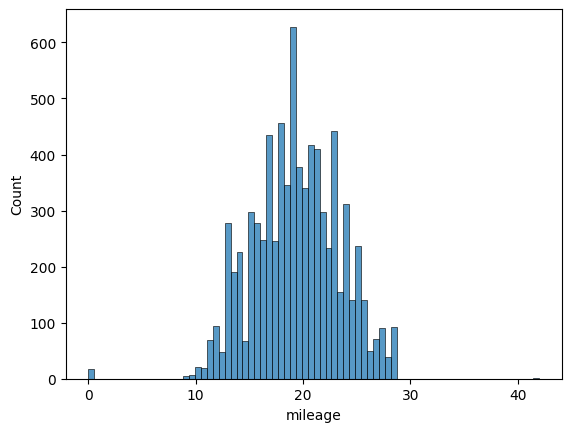

In [127]:
# Performing Univariate Analysis

sns.histplot(data= df, x= 'mileage')

<Axes: xlabel='selling_price', ylabel='Count'>

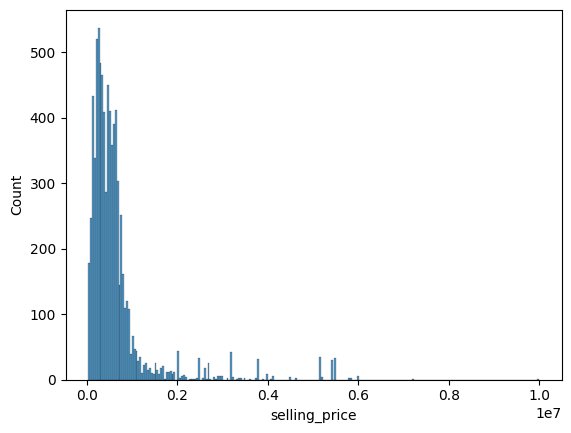

In [128]:
# Histogram of Selling Price
sns.histplot(data= df, x= 'selling_price')

<Axes: xlabel='fuel', ylabel='count'>

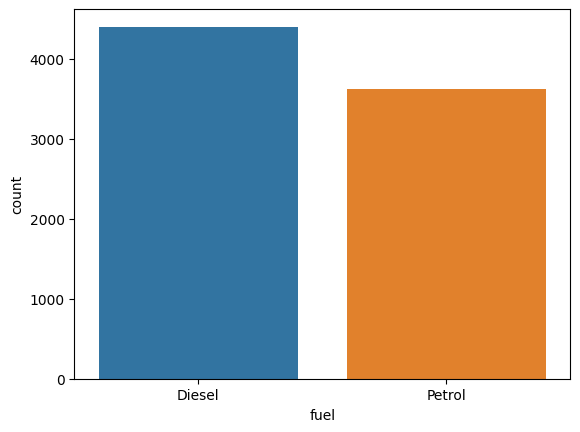

In [129]:
# Countplot of Fuel
sns.countplot(data= df, x= 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

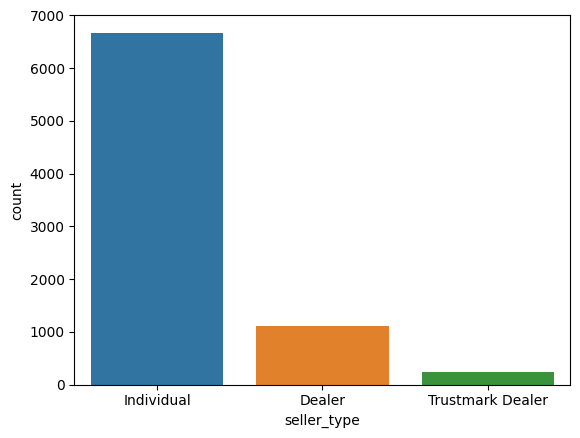

In [130]:
# graph of Selling type

sns.countplot(data= df, x= 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

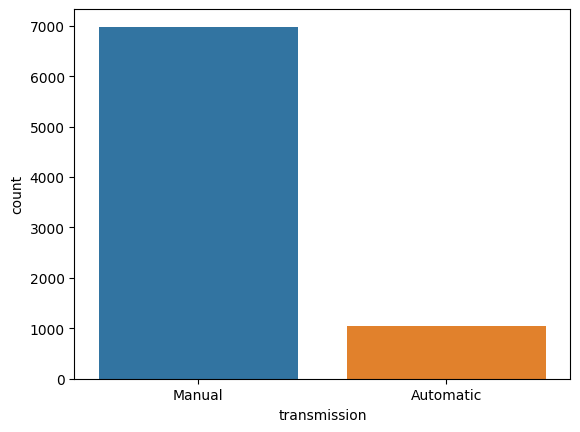

In [131]:
sns.countplot(data= df, x= 'transmission')

<Axes: xlabel='owner', ylabel='count'>

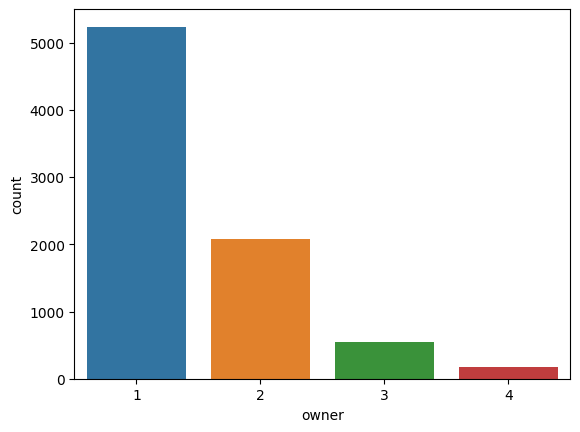

In [132]:
sns.countplot(data= df, x='owner')

<Axes: xlabel='engine', ylabel='Count'>

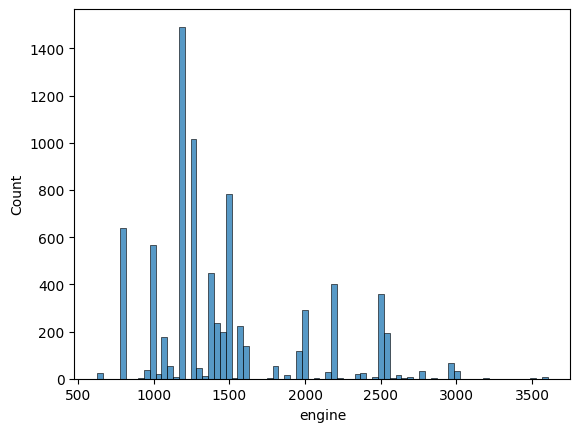

In [133]:
sns.histplot(data= df, x= 'engine')

<Axes: xlabel='max_power', ylabel='Count'>

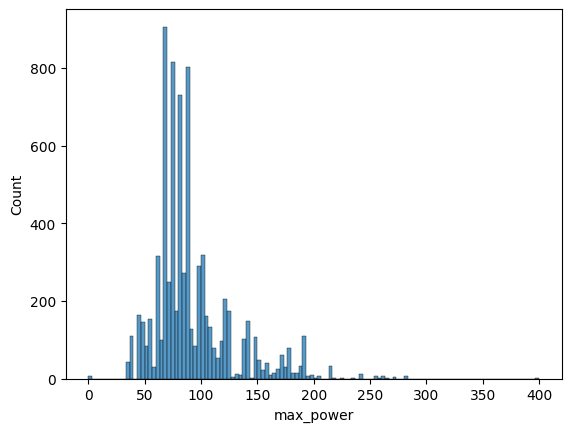

In [134]:
sns.histplot(data= df, x= 'max_power')

<Axes: xlabel='seats', ylabel='Count'>

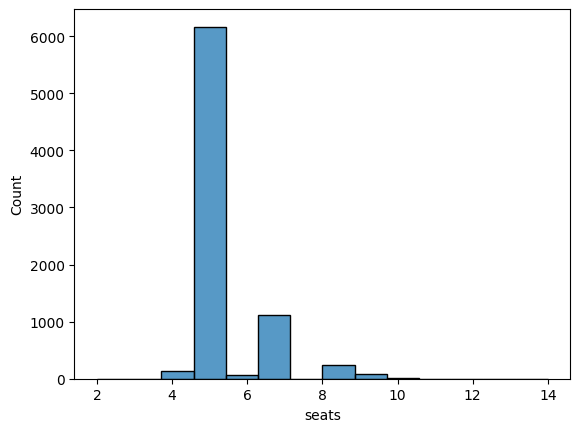

In [135]:
sns.histplot(data= df, x= 'seats')

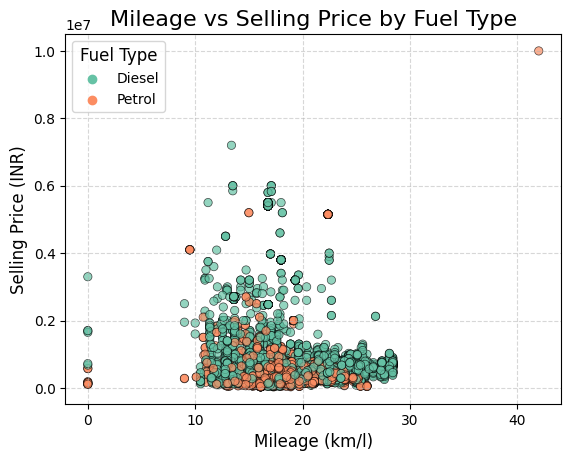

In [136]:
# sns.scatterplot(data = df,x='mileage', y= df['selling_price'], hue='fuel')
sns.scatterplot(data=df, x='mileage', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Mileage vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Mileage (km/l)", fontsize=12)
plt.ylabel("Selling Price (INR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

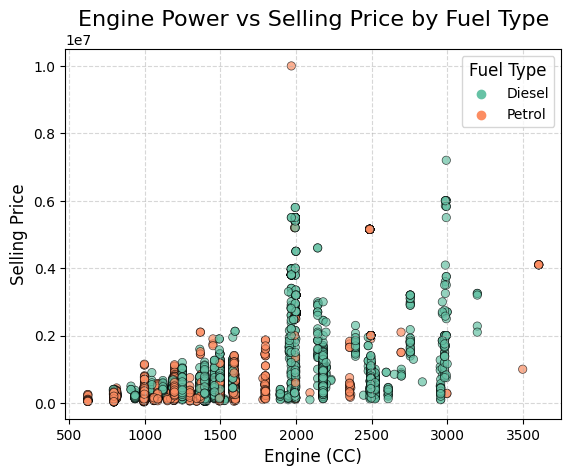

In [137]:
sns.scatterplot(data=df, x='engine', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("Engine Power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("Engine (CC)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

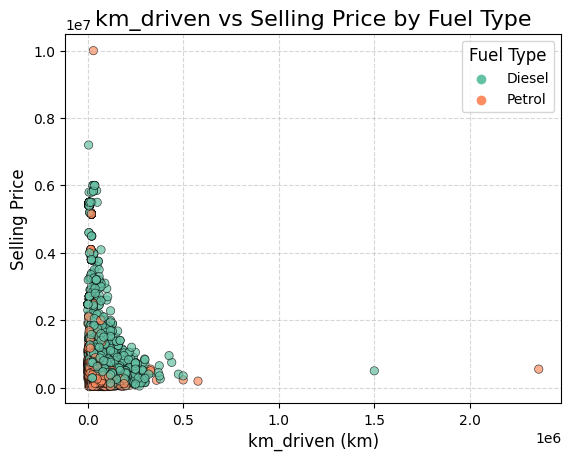

In [138]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("km_driven vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("km_driven (km)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()


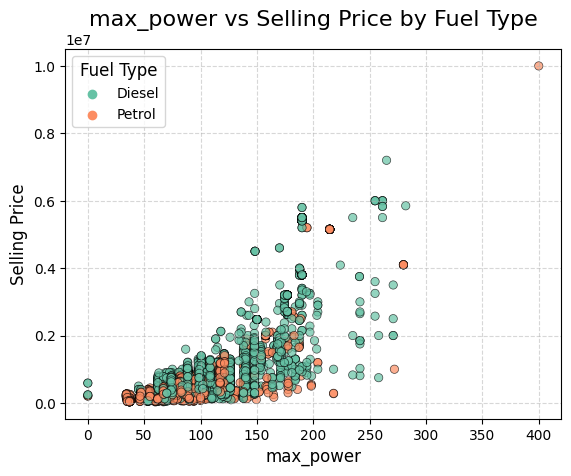

In [139]:
sns.scatterplot(data=df, x='max_power', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("max_power vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("max_power", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

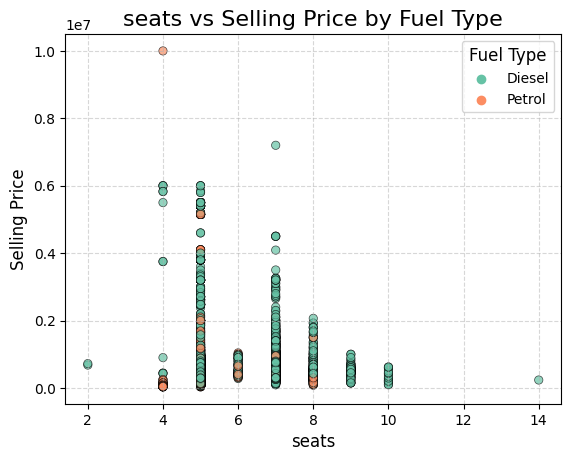

In [140]:
sns.scatterplot(data=df, x='seats', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("seats", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

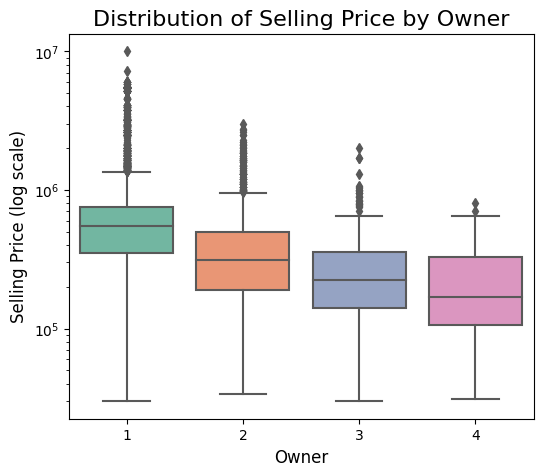

In [141]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='owner', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Owner", fontsize=16)
plt.xlabel("Owner", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12)
plt.show()

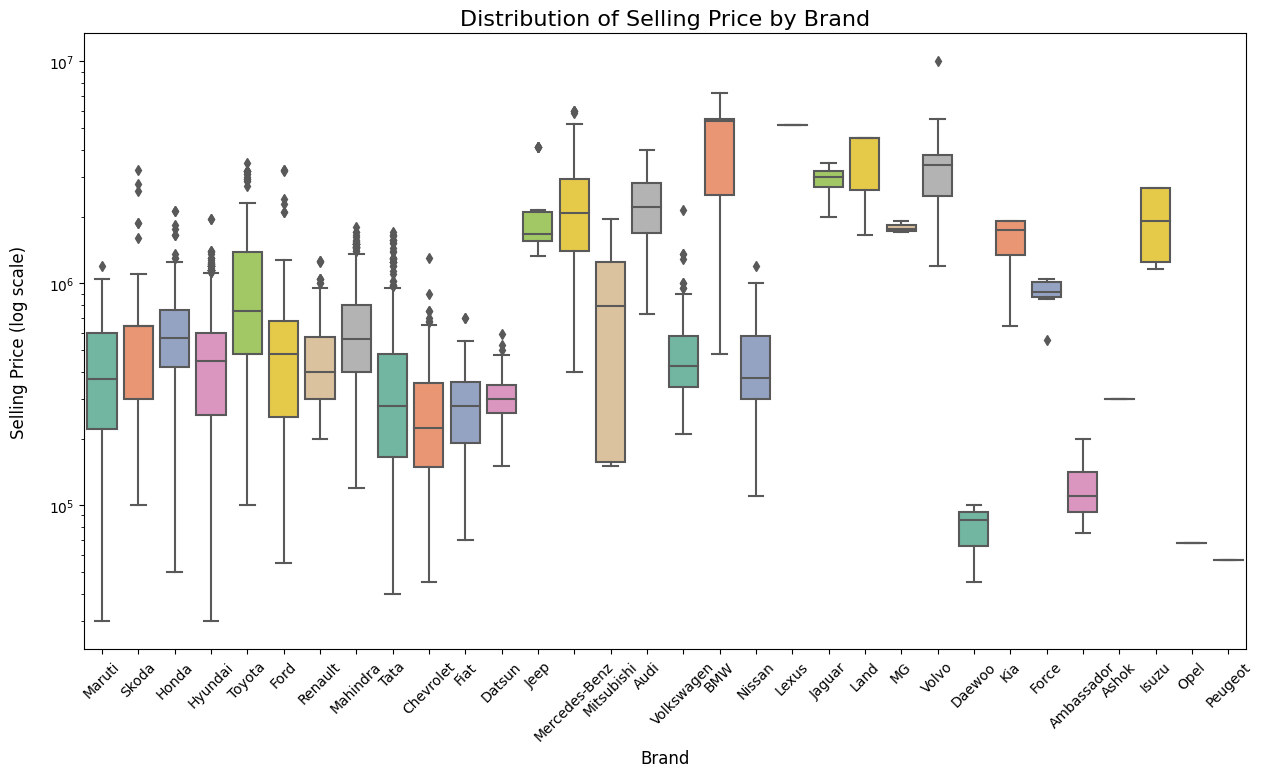

In [142]:
plt.figure(figsize=(15,8))  # make wider for readability
sns.boxplot(data=df, x='brand', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

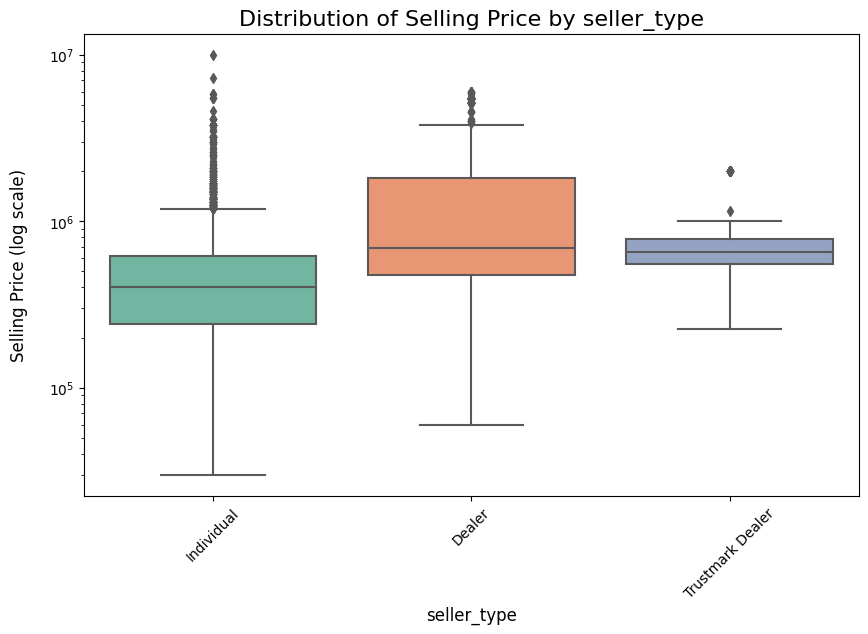

In [143]:
plt.figure(figsize=(10,6))  # make wider for readability
sns.boxplot(data=df, x='seller_type', y='selling_price', palette='Set2')
plt.yscale('log')   # log scale to handle skewed values
plt.title("Distribution of Selling Price by seller_type", fontsize=16)
plt.xlabel("seller_type", fontsize=12)
plt.ylabel("Selling Price (log scale)", fontsize=12, rotation=90, labelpad=15)  # vertical label with padding
plt.xticks(rotation=45)  # rotate x-axis labels if too crowded
plt.show()

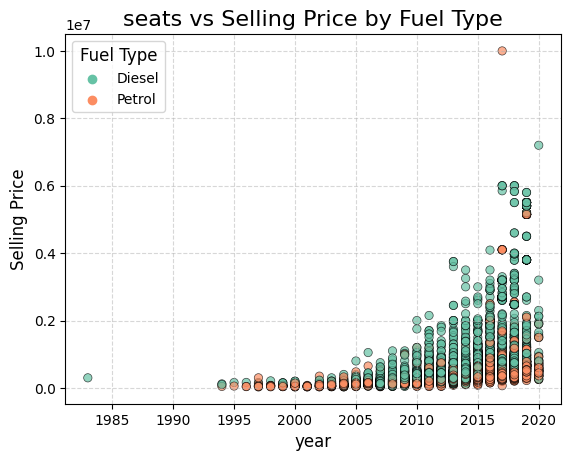

In [144]:
sns.scatterplot(data=df, x='year', y='selling_price', hue='fuel', sizes=(10, 20), palette='Set2',alpha=0.7, edgecolor='k',linewidth=0.5,marker='o')
plt.title("seats vs Selling Price by Fuel Type", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Fuel Type', fontsize=10, title_fontsize=12)
plt.show()

In [145]:
# Label Encoding Because I need to show the correlation
from sklearn.preprocessing import LabelEncoder
# brand_encoder = LabelEncoder()
# df['brand'] = brand_encoder.fit_transform(df['brand'])

fuel_encoder = LabelEncoder()
df['fuel'] = fuel_encoder.fit_transform(df['fuel'])

seller_type_encoder = LabelEncoder()
df['seller_type'] = seller_type_encoder.fit_transform(df['seller_type'])

transmission_encoder = LabelEncoder()
df['transmission'] = transmission_encoder.fit_transform(df['transmission'])

In [146]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def one_hot_transform(encoder, dataframe, feature):
    # Transform (already dense because sparse_output=False)
    encoded = encoder.transform(dataframe[[feature]])
    
    # Get category names (skip first if drop='first')
    categories = encoder.categories_[0]
    if encoder.drop == 'first':
        categories = categories[1:]
    encoded_df = pd.DataFrame(encoded, columns=[f"{feature}_{cat}" for cat in categories], index=dataframe.index)
    
    # Drop original column and concatenate
    dataframe = dataframe.drop(columns=[feature])
    dataframe = pd.concat([dataframe, encoded_df], axis=1)
    return dataframe



In [147]:
# Usage
brand_ohe = OneHotEncoder(drop='first', sparse_output=False).fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')


In [ ]:
df

In [53]:
df = df.drop(['index'], axis=1, errors='ignore')


In [153]:
df.head()

year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     0            1             1      1   
1  2014         370000     120000     0            1             1      2   
2  2006         158000     140000     1            1             1      3   
3  2010         225000     127000     0            1             1      1   
4  2007         130000     120000     1            1             1      1   

   mileage  engine  max_power  ...  brand_Mitsubishi  brand_Nissan  \
0    23.40  1248.0      74.00  ...               0.0           0.0   
1    21.14  1498.0     103.52  ...               0.0           0.0   
2    17.70  1497.0      78.00  ...               0.0           0.0   
3    23.00  1396.0      90.00  ...               0.0           0.0   
4    16.10  1298.0      88.20  ...               0.0           0.0   

   brand_Opel  brand_Peugeot  brand_Renault  brand_Skoda  brand_Tata  \
0         0.0            0.0            0.0          0.0         0.0   
1         0.0            0.0            0.0          1.0         0.0   
2         0.0            0.0            0.0          0.0         0.0   
3         0.0            0.0            0.0          0.0         0.0   
4         0.0            0.0            0.0          0.0         0.0   

   brand_Toyota  brand_Volkswagen  brand_Volvo  
0           0.0               0.0          0.0  
1           0.0               0.0          0.0  
2           0.0               0.0          0.0  
3           0.0               0.0          0.0  
4           0.0               0.0          0.0  

[5 rows x 42 columns]

In [55]:
# Excluding one-hot encoded columns
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

<Axes: >

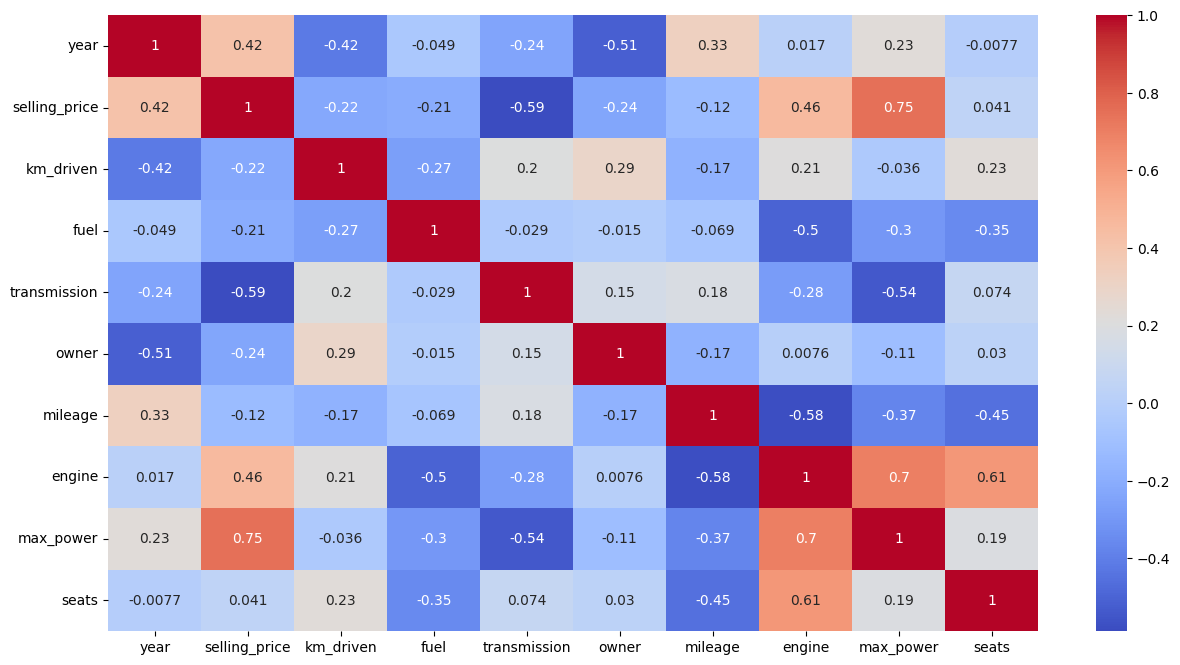

In [56]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

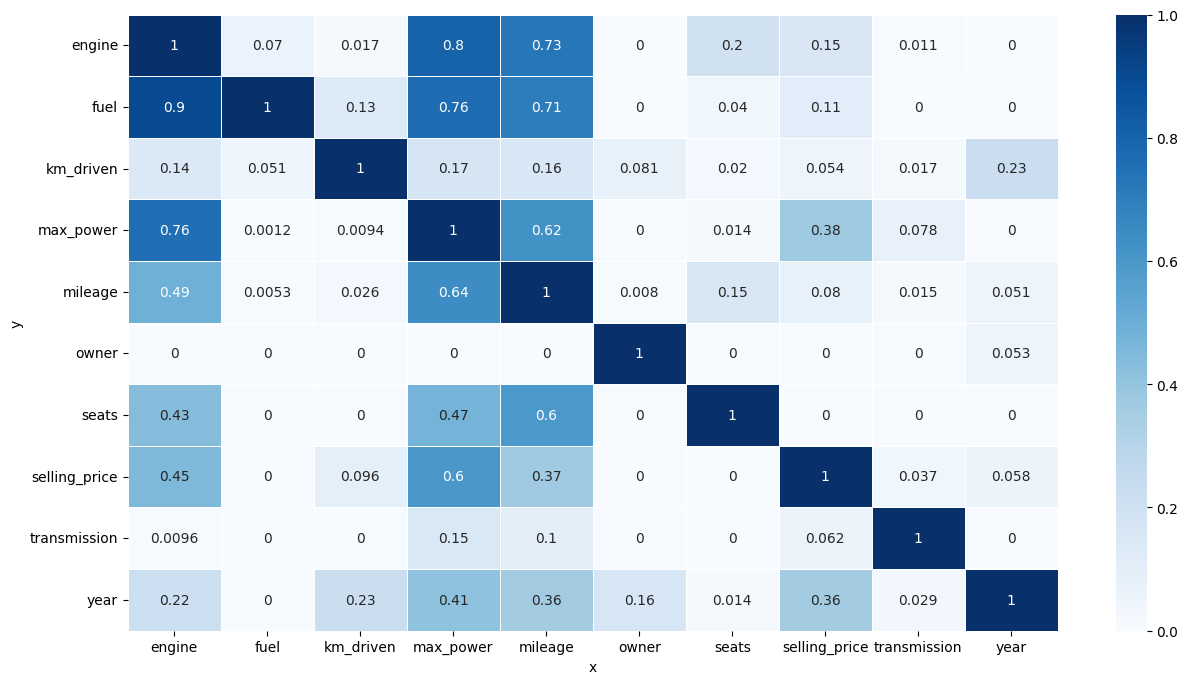

In [57]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [58]:
df['selling_price'] = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4))
df.head()

year selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014             1     145500     0            1             1      1   
1  2014             1     120000     0            1             1      2   
2  2006             0     140000     1            1             1      3   
3  2010             0     127000     0            1             1      1   
4  2007             0     120000     1            1             1      1   

   mileage  engine  max_power  ...  brand_Mitsubishi  brand_Nissan  \
0    23.40  1248.0      74.00  ...               0.0           0.0   
1    21.14  1498.0     103.52  ...               0.0           0.0   
2    17.70  1497.0      78.00  ...               0.0           0.0   
3    23.00  1396.0      90.00  ...               0.0           0.0   
4    16.10  1298.0      88.20  ...               0.0           0.0   

   brand_Opel  brand_Peugeot  brand_Renault  brand_Skoda  brand_Tata  \
0         0.0            0.0            0.0          0.0         0.0   
1         0.0            0.0            0.0          1.0         0.0   
2         0.0            0.0            0.0          0.0         0.0   
3         0.0            0.0            0.0          0.0         0.0   
4         0.0            0.0            0.0          0.0         0.0   

   brand_Toyota  brand_Volkswagen  brand_Volvo  
0           0.0               0.0          0.0  
1           0.0               0.0          0.0  
2           0.0               0.0          0.0  
3           0.0               0.0          0.0  
4           0.0               0.0          0.0  

[5 rows x 42 columns]

In [59]:
# Get the column names after one-hot encoding
brand_cats = [f"brand_{cat}" for cat in brand_ohe.categories_[0][1:]]

# Select features
selected_cols = ['max_power', 'year', 'fuel', 'mileage'] + brand_cats
X = df[selected_cols]
y = df['selling_price']

In [60]:
k = len(set(y))
k

4

In [61]:
df.head()

year selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014             1     145500     0            1             1      1   
1  2014             1     120000     0            1             1      2   
2  2006             0     140000     1            1             1      3   
3  2010             0     127000     0            1             1      1   
4  2007             0     120000     1            1             1      1   

   mileage  engine  max_power  ...  brand_Mitsubishi  brand_Nissan  \
0    23.40  1248.0      74.00  ...               0.0           0.0   
1    21.14  1498.0     103.52  ...               0.0           0.0   
2    17.70  1497.0      78.00  ...               0.0           0.0   
3    23.00  1396.0      90.00  ...               0.0           0.0   
4    16.10  1298.0      88.20  ...               0.0           0.0   

   brand_Opel  brand_Peugeot  brand_Renault  brand_Skoda  brand_Tata  \
0         0.0            0.0            0.0          0.0         0.0   
1         0.0            0.0            0.0          1.0         0.0   
2         0.0            0.0            0.0          0.0         0.0   
3         0.0            0.0            0.0          0.0         0.0   
4         0.0            0.0            0.0          0.0         0.0   

   brand_Toyota  brand_Volkswagen  brand_Volvo  
0           0.0               0.0          0.0  
1           0.0               0.0          0.0  
2           0.0               0.0          0.0  
3           0.0               0.0          0.0  
4           0.0               0.0          0.0  

[5 rows x 42 columns]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
null_train = X_train.isna().sum()
null_train[null_train > 0]

max_power    165
mileage      171
dtype: int64

In [64]:
null_test = X_test.isna().sum()
null_test[null_test > 0]

max_power    43
mileage      43
dtype: int64

In [65]:
y_train.isna().sum()

0

Mean of max_power: 91.8197257033248
Median of max_power: 82.4


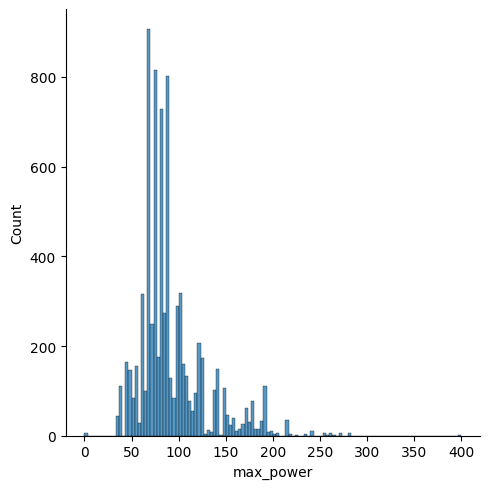

In [66]:
# Let's inspect the distribution plot, mean and median of max_power again
sns.displot(data=df, x='max_power')

print(f"Mean of max_power: {df['max_power'].mean()}")
print(f"Median of max_power: {df['max_power'].median()}")

In [67]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

Mean of mileage: 19.391961863322244
Median of mileage: 19.3


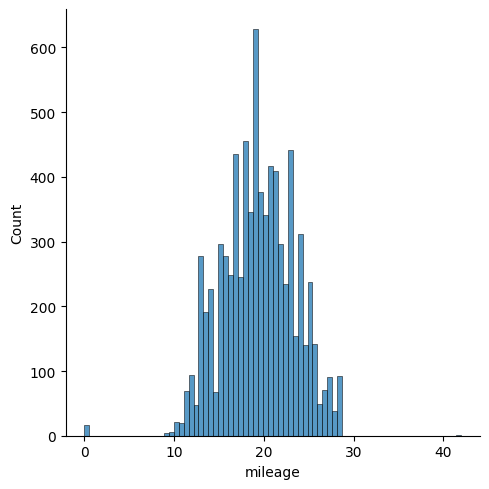

In [68]:
# Let's inspect the distribution plot, mean and median of mileage
sns.displot(data=df, x='mileage')

print(f"Mean of mileage: {df['mileage'].mean()}")
print(f"Median of mileage: {df['mileage'].median()}")

In [69]:

X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

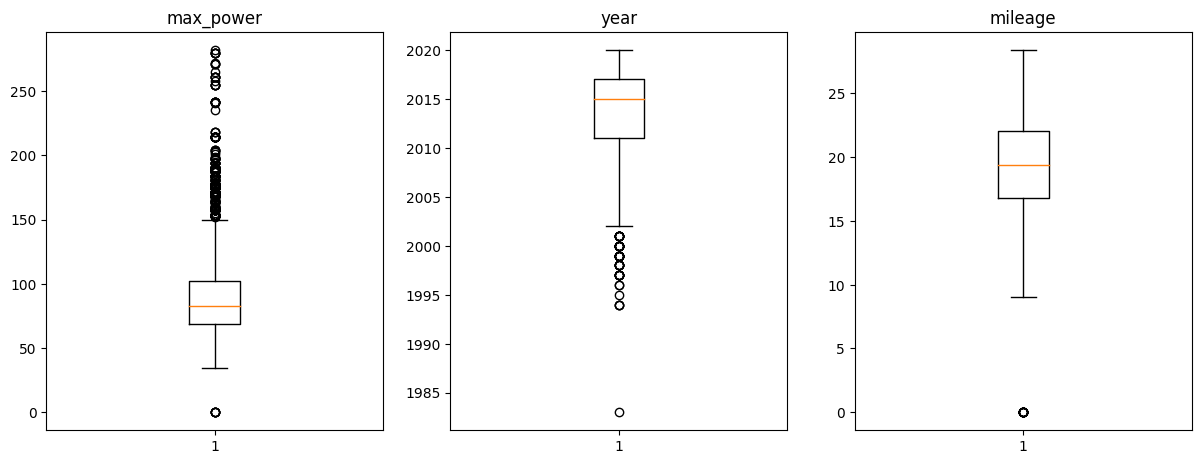

In [70]:
# Create a dictionary of columns.
col_dict = {'max_power': 1,'year': 2, 'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [71]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [72]:
for col in X_train[['max_power', 'year','mileage']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


In [73]:
from sklearn.preprocessing import StandardScaler

# Define a list of numerical feature names that need to be scaled
num_cols = ['max_power', 'year', 'mileage']
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])

In [74]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [75]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [76]:
# Let's check shapes of all X_train, X_test, Y_train_encoded, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422, 4)
Shape of y_test:  (1606,)


In [77]:
import time
from sklearn.metrics import classification_report
import mlflow

In [78]:
# mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# mlflow.set_experiment(experiment_name="st125985-a3")
import mlflow

# Connect to MLflow server on your laptop (host port 5001)
mlflow.set_tracking_uri("http://mlflow:5001")

# Set or create your experiment
mlflow.set_experiment("st125985-a3")




<Experiment: artifact_location='/mlflow/mlruns/469864923438442098', creation_time=1758123391449, experiment_id='469864923438442098', last_update_time=1758123391449, lifecycle_stage='active', name='st125985-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [79]:
class LogisticRegression:
    

    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None  # Will be initialized later
        self.losses = []

    def fit(self, X, Y):
        """
        Fit the logistic regression model to the training data.

        Args:
            X (numpy.ndarray): Training data features.
            Y (numpy.ndarray): Training data labels.

        Returns:
            None
        """
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])  # With replacement
                batch_X = X[ix:ix + batch_size]
                batch_Y = Y[ix:ix + batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        """
        Compute the gradient and loss for the logistic regression model.

        Args:
            X (numpy.ndarray): Input data features.
            Y (numpy.ndarray): Input data labels.

        Returns:
            float: Loss.
            numpy.ndarray: Gradient.
        """
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = -np.sum(Y * np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        """
        Compute the softmax probabilities.

        Args:
            theta_t_x (numpy.ndarray): Input data.

        Returns:
            numpy.ndarray: Softmax probabilities.
        """
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        """
        Compute the gradient for softmax regression.

        Args:
            X (numpy.ndarray): Input data features.
            error (numpy.ndarray): Error.

        Returns:
            numpy.ndarray: Gradient.
        """
        return X.T @ error

    def h_theta(self, X, W):
        """
        Compute the predicted probabilities.

        Args:
            X (numpy.ndarray): Input data features.
            W (numpy.ndarray): Model weights.

        Returns:
            numpy.ndarray: Predicted probabilities.
        """
        return self.softmax(X @ W)

    def predict(self, X_test):
        """
        Predict class labels for input data.

        Args:
            X_test (numpy.ndarray): Input data for prediction.

        Returns:
            numpy.ndarray: Predicted class labels.
        """
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def plot(self):
        """
        Plot the training losses.

        Returns:
            None
        """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        """
        Compute classification accuracy.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Accuracy.
        """
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        """
        Compute precision for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Precision.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):
        """
        Compute recall for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Recall.
        """
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):
        """
        Compute F1-score for a specific class `c`.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: F1-score.
        """
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):
        """
        Compute macro-averaged precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged precision.
        """
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):
        """
        Compute macro-averaged recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged recall.
        """
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):
        """
        Compute macro-averaged F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Macro-averaged F1-score.
        """
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
        """
        Compute weighted precision.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted precision.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):
        """
        Compute weighted recall.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted recall.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):
        """
        Compute weighted F1-score.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            float: Weighted F1-score.
        """
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):
        """
        Generate a classification report.

        Args:
            y_test (numpy.ndarray): True class labels.
            y_pred (numpy.ndarray): Predicted class labels.

        Returns:
            pandas.DataFrame: Classification report.
        """
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

In [80]:
class RidgePenalty:
    """Ridge penalty (L2 regularization) for logistic regression.

    Args:
        l (float): Regularization strength.
    """

    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        """Compute the Ridge penalty term.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            float: Ridge penalty term.
        """
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        """Compute the derivative of the Ridge penalty.

        Args:
            theta (numpy.ndarray): Model parameters.

        Returns:
            numpy.ndarray: Derivative of the Ridge penalty.
        """
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    """Logistic Regression with Ridge (L2) regularization.

    Args:
        l (float): Regularization strength.
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    """Logistic Regression without regularization.

    Args:
        k (int): Number of classes.
        n (int): Number of features.
        method (str): Optimization method ('batch', 'minibatch', or 'sto').
        alpha (float, optional): Learning rate (default is 0.001).
        max_iter (int, optional): Maximum number of iterations (default is 5000).
    """

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)

In [81]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

# Performing experiment

In [82]:
# Grid search with regularization method (normal and), methods, and alpha values

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.4239494017735044
Loss at iteration 500 4.631121934682107
Loss at iteration 1000 4.595621906489715
Loss at iteration 1500 4.588742119770265
Loss at iteration 2000 4.581801641679719
Loss at iteration 2500 4.5683450571048745
Loss at iteration 3000 4.56400106442049
Loss at iteration 3500 4.5606679484688835
Loss at iteration 4000 4.558832728757858
Loss at iteration 4500 4.557489610165189
Loss at iteration 5000 4.554043031667507
Loss at iteration 5500 4.55185198049221
Loss at iteration 6000 4.549608263143879
Loss at iteration 6500 4.5472111517894005
Loss at iteration 7000 4.546234003460866
Loss at iteration 7500 4.545814414644
Loss at iteration 8000 4.545596326943837
Loss at iteration 8500 4.54546431194738
Loss at iteration 9000 4.545375365029723
Loss at iteration 9500 4.545310774196059
time taken: 39.29969120025635
Final Training Loss: 5.35549177457928
Normal batch
alpha: 0.001
Loss at iteration 0 1.2832409452027824
Loss at iteration 500 0.6030

### Finding the best model and comparing its confusion matrix with sklearn

Best Model:
Regularization: Normal
Method: sto
Final Training Loss: 0.19275772176904915


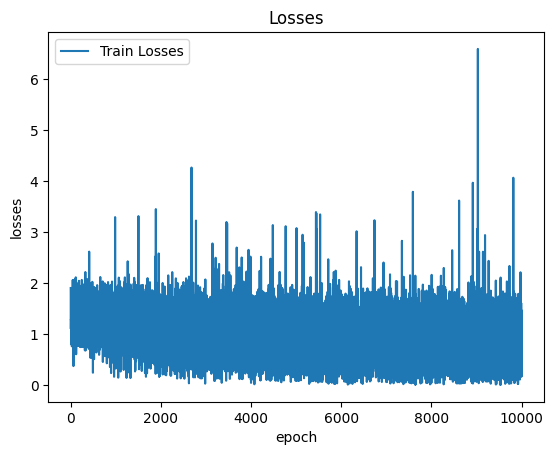

In [83]:
# Plotting the loss graph the graph of the best model
print("=" * 40)
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
print("=" * 40)
best_model.plot()
plt.show()

In [84]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1-score
0          0.66323  0.939173  0.777442
1         0.555944  0.348684  0.428571
2         0.459547  0.403409  0.429652
3         0.657343  0.728682  0.691176
accuracy                      0.603362
macro     0.584016  0.604987  0.581711
weighted  0.586706  0.603362  0.581370


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       411
           1       0.56      0.35      0.43       456
           2       0.46      0.40      0.43       352
           3       0.66      0.73      0.69       387

    accuracy                           0.60      1606
   macro avg       0.58      0.60      0.58      1606
weighted avg       0.59      0.60      0.58      1606



In [371]:
## The support in the Skearn's Classificatin Report shows that the test dataset has four category  \n The 0 category has 411 sample, 1 category has 456 sample, 2 category has 352 samples and category 3 has 387 sample.

### Testing the model importing from MLFlow

In [85]:

import pickle

# paths of all components for car price predictions
brand_label_encoder_path = 'Model/car_brand_encoder.model'
scaler_path = 'Model/car-scaling.model'
fuel_label_encoder_path = 'Model/car_fuel_encoder.model'
pickle.dump(brand_ohe, open(brand_label_encoder_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
pickle.dump(fuel_encoder, open(fuel_label_encoder_path, 'wb'))




In [86]:
print(model)

### Registration model with the run id and and model name

In [89]:
# To veiw all the metrics
from mlflow.tracking import MlflowClient

# client = MlflowClient()
# runs = client.search_runs(experiment_ids=[469864923438442098])

# for r in runs:
#     print(f"Run ID: {r.info.run_id}")
#     print("Metrics:", r.data.metrics)

In [90]:
## Deleting the modoel
from mlflow.tracking import MlflowClient

client = MlflowClient()
model_name = "st125985-a3-model"

# Delete all versions first
for mv in client.get_latest_versions(model_name):
    client.delete_model_version(name=model_name, version=mv.version)

# Delete the registered model itself
client.delete_registered_model(name=model_name)

print(f"Deleted model '{model_name}' successfully!")




Deleted model 'st125985-a3-model' successfully!


In [91]:
## Registering the model with best run id
import mlflow
from mlflow.tracking import MlflowClient

# MLflow client
client = MlflowClient()

# Your new model name
model_name = "st125985-a3-model"

# Best run info
best_run_id = "aa17fb00f4674785adf26704c2ab3575"
model_uri = f"runs:/{best_run_id}/model"  # Assuming your model artifact is saved under "model"

# Check if the model already exists and delete if needed
try:
    client.delete_registered_model(name=model_name)
    print(f"Deleted existing registered model '{model_name}'")
except Exception as e:
    print(f"No existing model to delete or error: {e}")

# Register the new model
registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
print(f"Registered new model '{model_name}' with version: {registered_model.version}")


No existing model to delete or error: RESOURCE_DOES_NOT_EXIST: Registered Model with name=st125985-a3-model not found


Successfully registered model 'st125985-a3-model'.
2025/09/18 05:43:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: st125985-a3-model, version 1


Registered new model 'st125985-a3-model' with version: 1


Created version '1' of model 'st125985-a3-model'.


In [92]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
for mv in client.get_latest_versions("st125985-a3-model"):
    print(f"Version: {mv.version}, Stage: {mv.current_stage}")

Version: 1, Stage: None


In [93]:
# Model promoted to Production!
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Promote version 1 to Production
client.transition_model_version_stage(
    name="st125985-a3-model",
    version=1,
    stage="Production",
    archive_existing_versions=True  # optional: archive any other Production version
)

print("Model promoted to Production!")

Model promoted to Production!


In [95]:
## Loading the model from model registry
import mlflow.pyfunc
model = mlflow.pyfunc.load_model("models:/st125985-a3-model/Production")

OSError: No such file or directory: '/mlflow/mlruns/469864923438442098/aa17fb00f4674785adf26704c2ab3575/artifacts/model/.'

In [101]:
import mlflow

run_id = "aa17fb00f4674785adf26704c2ab3575"
client = mlflow.tracking.MlflowClient()

# List all artifacts in the run
artifacts = client.list_artifacts(run_id)
for a in artifacts:
    print(a.path)


In [94]:
# Loading directly from a Run
best_run_id = "aa17fb00f4674785adf26704c2ab3575"
model_uri = f"runs:/{best_run_id}/model"
model = mlflow.pyfunc.load_model(model_uri)

OSError: No such file or directory: '/mlflow/mlruns/469864923438442098/aa17fb00f4674785adf26704c2ab3575/artifacts/model'

In [410]:
# predict X_test based on the loaded model
import pandas as pd
precited_selling_price= model.predict(pd.DataFrame(X_test))
precited_selling_price[:10]

array([0, 3, 1, 2, 3, 0, 1, 1, 1, 1])

In [411]:
# The actual values of y
y_test[:10]

array([0, 3, 1, 2, 2, 0, 1, 2, 0, 1])

In [412]:
# Create a new dataframe we are going to perform inference with 
sample_df = pd.DataFrame([[107, 2017,100, 0, 'BMW']],
                         columns=['max_power', 'year','mileage', 'fuel', 'brand'])
sample_df

max_power  year  mileage  fuel brand
0        107  2017      100     0   BMW

In [413]:
# Encode and scale each feature
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

max_power  year  mileage  fuel  brand_Ashok  brand_Audi  brand_BMW  \
0        107  2017      100     0          0.0         0.0        1.0   

   brand_Chevrolet  brand_Daewoo  brand_Datsun  ...  brand_Mitsubishi  \
0              0.0           0.0           0.0  ...               0.0   

   brand_Nissan  brand_Opel  brand_Peugeot  brand_Renault  brand_Skoda  \
0           0.0         0.0            0.0            0.0          0.0   

   brand_Tata  brand_Toyota  brand_Volkswagen  brand_Volvo  
0         0.0           0.0               0.0          0.0  

[1 rows x 35 columns]

In [414]:
# Find the required output class of the input
output = model.predict(sample_df)
output

/tmp/ipykernel_17/3691783347.py:120: RuntimeWarning: overflow encountered in exp
  return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)
/tmp/ipykernel_17/3691783347.py:120: RuntimeWarning: invalid value encountered in divide
  return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)


array([2])

In [1]:
for exp in mlflow.list_experiments():
    print(exp.name, exp.experiment_id)


NameError: name 'mlflow' is not defined